<a href="https://colab.research.google.com/github/dhruvdankhara/iris-dataset-supervised-learning/blob/main/iris_dataset_supervise_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Load the Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset loaded. Features: {feature_names}, Targets: {target_names}")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"First 5 rows of features:\n{X[:5]}")
print(f"First 5 targets: {y[:5]}")
print(f"Unique target values: {np.unique(y)}")

Dataset loaded. Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], Targets: ['setosa' 'versicolor' 'virginica']
Shape of features (X): (150, 4)
Shape of target (y): (150,)
First 5 rows of features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 targets: [0 0 0 0 0]
Unique target values: [0 1 2]


## 3. Exploratory Data Analysis (EDA)

In [3]:
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['species'] = y
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(target_names)})

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
print(iris_df['species_name'].value_counts())

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Visualizations

### Pairplot

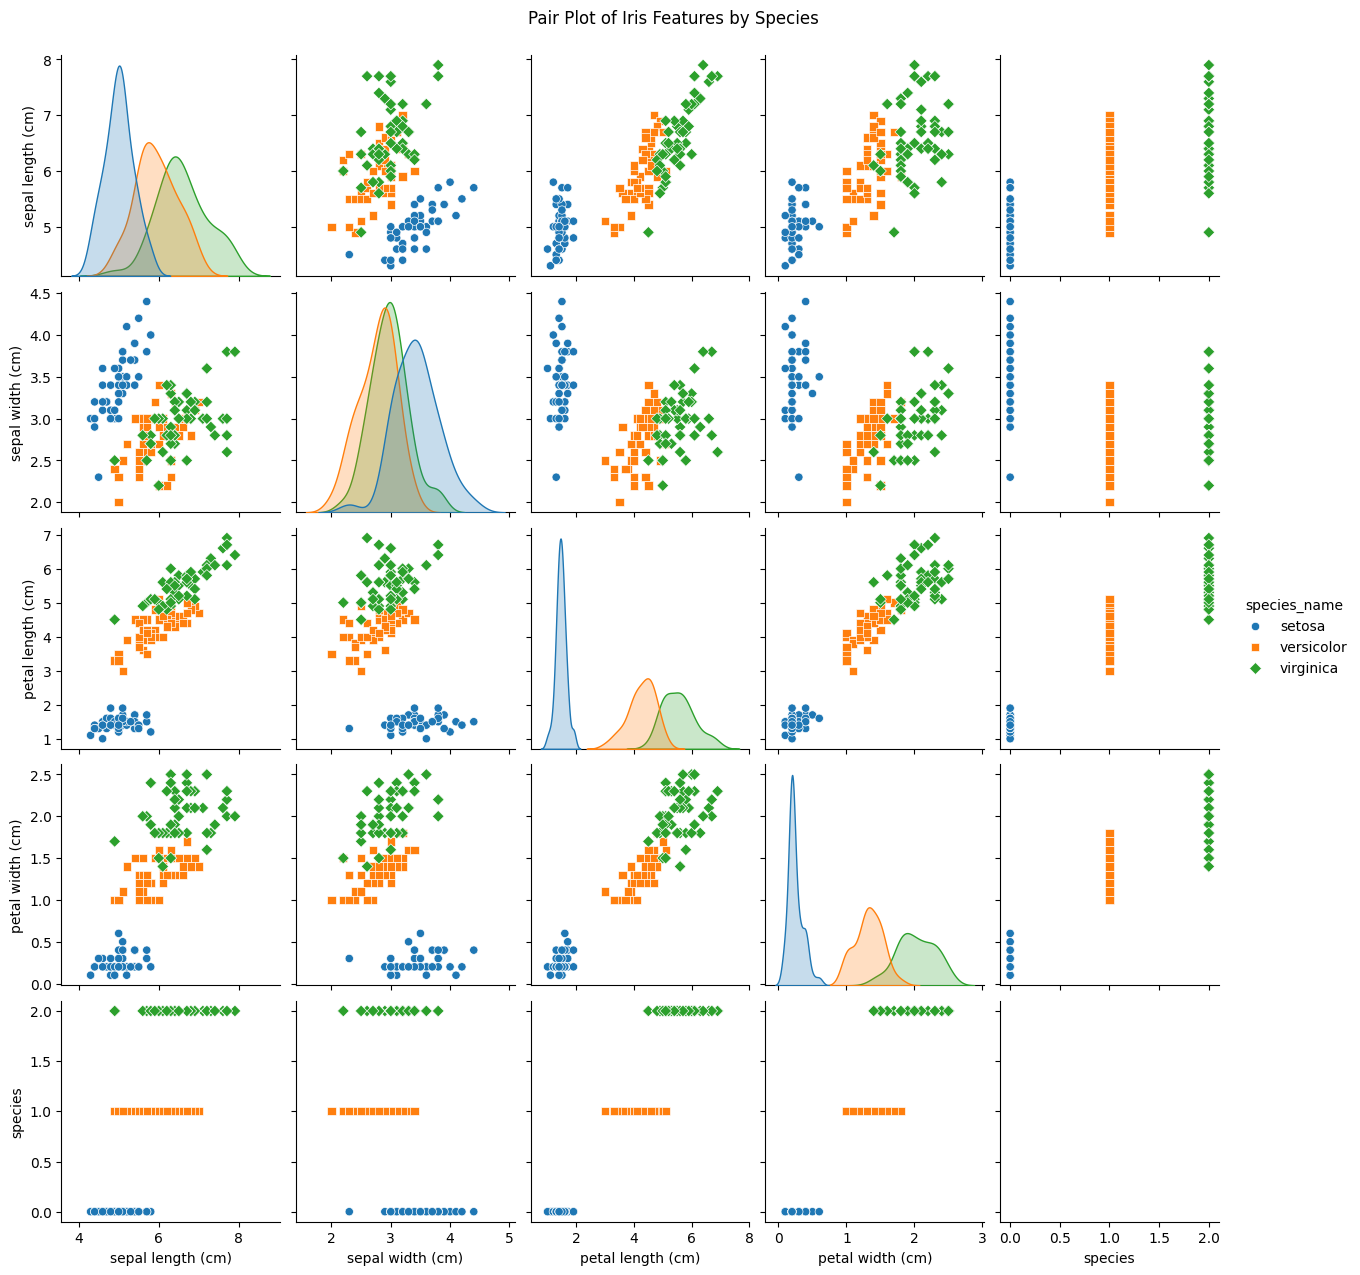

In [6]:
sns.pairplot(iris_df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features by Species", y=1.02)
plt.show()

### Box plots

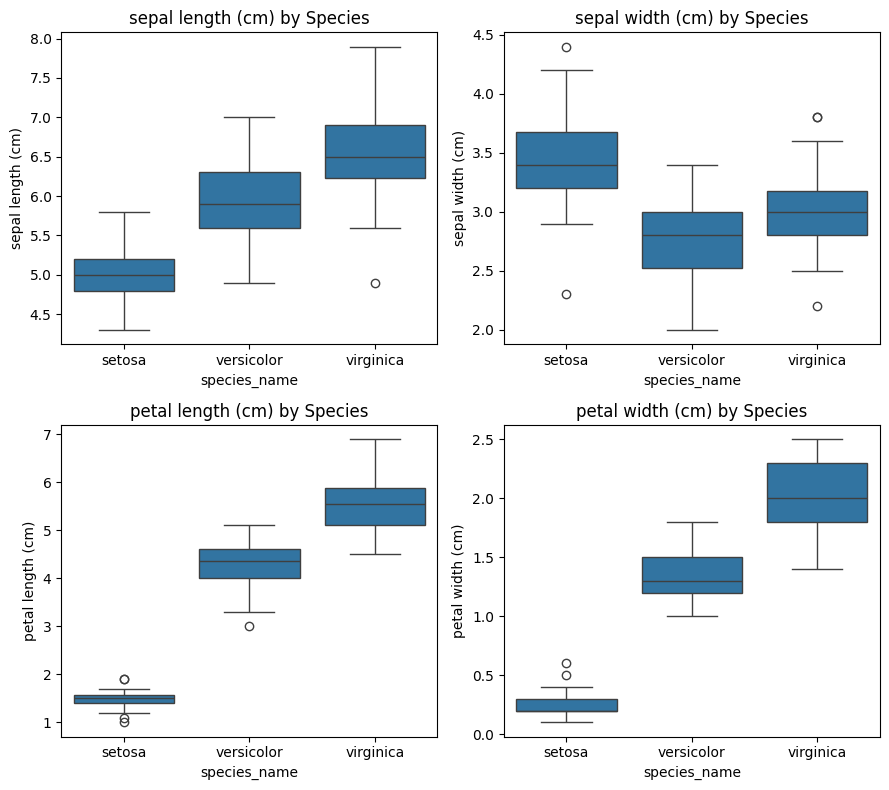

In [7]:
plt.figure(figsize=(9, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species_name', y=feature, data=iris_df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()

### Correlation heatmap

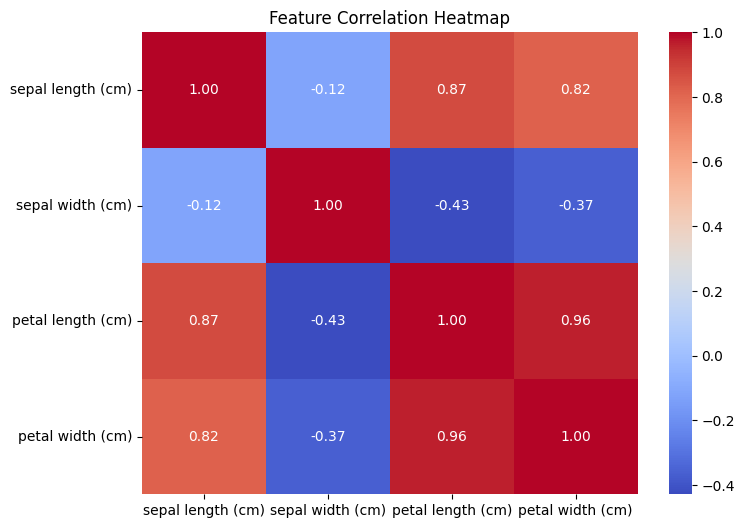

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df[feature_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## 4. Data Preprocessing

### Split data into Training and Testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set shape: X={X_test.shape}, y={y_test.shape}")

Training set shape: X=(120, 4), y=(120,)
Testing set shape: X=(30, 4), y=(30,)


### Feature Scaling

In [10]:
# Scaling features is important for algorithms like SVM, Logistic Regression, KNN
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Selection and Training


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

## 6. Model Evaluation



Evaluating Logistic Regression...
Accuracy: 1.0000


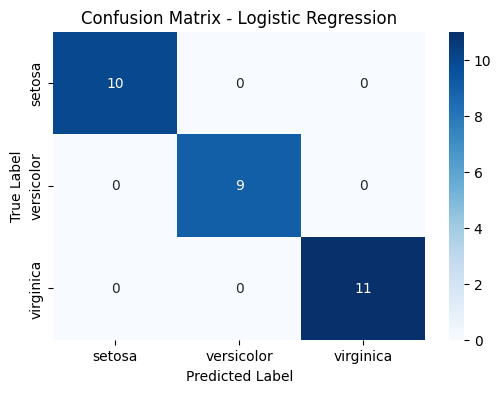



Evaluating K-Nearest Neighbors (KNN)...
Accuracy: 1.0000


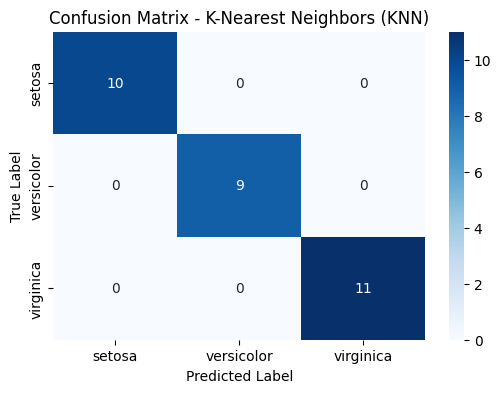



Evaluating Decision Tree...
Accuracy: 1.0000


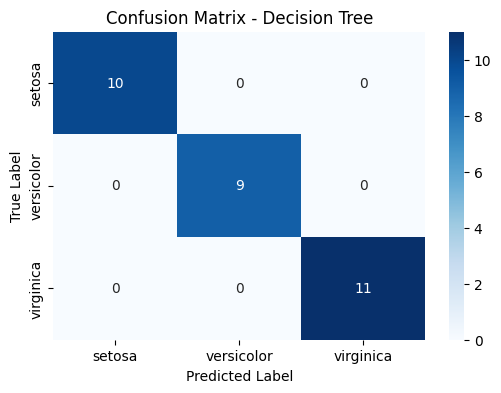



Evaluating Random Forest...
Accuracy: 1.0000


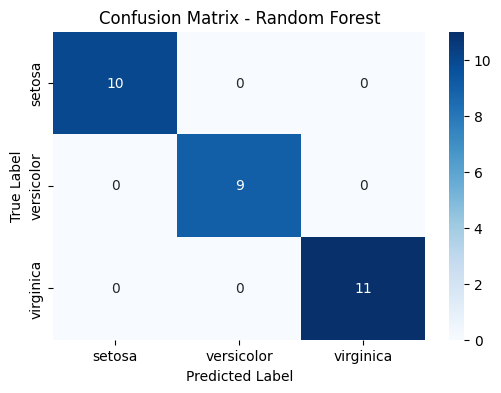





Best model based on accuracy: Logistic Regression (Accuracy: 1.0000)


In [12]:
evaluation_results = {}

for name, model in trained_models.items():
    print("\n===================================================================")
    print(f"\nEvaluating {name}...")

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    evaluation_results[name] = {'accuracy': accuracy, 'cm': cm}

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['accuracy'])
best_model = trained_models[best_model_name]

print("\n\n===================================================================\n")
print(f"\nBest model based on accuracy: {best_model_name} (Accuracy: {evaluation_results[best_model_name]['accuracy']:.4f})")

## 7. Make Prediction on New Data

In [13]:
# data of 'versicolor'
new_flower_data = np.array([[6.0, 2.9, 4.5, 1.5]])
print(f"New flower data (unscaled): {new_flower_data}")

new_flower_scaled = scaler.transform(new_flower_data)
print(f"New flower data (scaled): {new_flower_scaled}")

New flower data (unscaled): [[6.  2.9 4.5 1.5]]
New flower data (scaled): [[ 0.23261993 -0.36147005  0.44316389  0.4227026 ]]


In [14]:
prediction = best_model.predict(new_flower_scaled)
predicted_species_index = prediction[0]
predicted_species_name = target_names[predicted_species_index]

print(f"Predicted species index: {predicted_species_index}")
print(f"Predicted species name: {predicted_species_name}")

Predicted species index: 1
Predicted species name: versicolor


In [15]:
probabilities = best_model.predict_proba(new_flower_scaled)
print("Prediction Probabilities: ")
for i, name in enumerate(target_names):
  print(f"  {name}: {probabilities[0][i]:.4f}")

Prediction Probabilities: 
  setosa: 0.0132
  versicolor: 0.7594
  virginica: 0.2274
